# Task 2: Medical Appointments No Shows Data Analysis

## Table of contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
## Introduction 

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). The dataset contains about 110k medical appointments with its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Reference to Joni Hoppen and Aquarela Advanced Analytics [Aquarela](http://bit.ly/2Ulwskh).

### Some Definitions:

- **Hipertension:** Also known as high blood pressure (HBP), is a long-term medical condition in which the blood pressure in the arteries is persistently elevated.
- **Alcoholism:** Broadly, any drinking of alcohol that results in significant mental or physical health problems. 
- **Handcap:** Disability, an impairment that substantially affects a person's life activities, and may be present at birth or arise later in life.
- **Diabetes:** A disease in which your blood glucose, or blood sugar, levels are too high.
- **Scholarship:** This variable means this concept: [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

### Data Dictionary

- **PatientId:** Identification of a patient
- **AppointmentID:** Identification of each appointment
- **Gender:** Male or Female.
- **ScheduledDay:** The day someone called or registered the appointment, this is before appointment of course.
- **DataAgendamento:** The day of the actuall appointment, when they have to visit the doctor.
- **Age:** How old is the patient.
- **Neighbourhood:** Where the appointment takes place.
- **Scholarship:** True of False.
- **Hipertension:** True or False.
- **Diabetes:** True or False.
- **Alcoholism:** True or False.
- **Handcap:** True or False.
- **SMS_received:** 1 or more messages sent to the patient.
- **No-show:** True or False.

### Questions that would be able to answer during our analysis:

- What is the percentage of patients who showed up and who didn't?
- Who is the most committed to the schedule males or females?
- Does receiving SMS or not affect showing up the patients?
- Does the duration between the apointment day and the schedule day affect showing up the patients?
- Dows alcoholism affect the ability to show up?
- Where is the place that most patients showed up?
- What is the most disease by which the patients are diagnosed?
- Does a certain age more committed to the appointment than the others?

In order to address those questions, there are some things to do such as:

1. Cleaning the dataset from any incorrect datatypes or null values.
2. Calculating some statistics about the variables and look for any relationships in the data.
3. Drawing conclusions with some charts and communicating the findings.

In [1]:
# turn off scientific notation like 1e+06
options(scipen=999, warn=-1)
# Import Libraries
library(dplyr)
library(ggplot2)
theme_set(theme_minimal())


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<a id="wrangling"></a>
## Data Wrangling

### Gathering

In [2]:
# Read the dataset as dataframe
appointment_data <- read.csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
# Last 5 rows of the dataset
tail(appointment_data, 5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show
110523,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110524,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110526,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110527,377511518121127,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Assessing

In [4]:
# Appointments data rows and columns respectively 
dim(appointment_data)

[1] 110527     14

In [5]:
summary(appointment_data)

   PatientId               AppointmentID     Gender   
 Min.   :          39218   Min.   :5030230   F:71840  
 1st Qu.:  4172614444190   1st Qu.:5640286   M:38687  
 Median : 31731838714000   Median :5680573            
 Mean   :147496265710000   Mean   :5675305            
 3rd Qu.: 94391720898200   3rd Qu.:5725524            
 Max.   :999981631772000   Max.   :5790484            
                                                      
               ScheduledDay                 AppointmentDay       Age        
 2016-05-06T07:09:54Z:    24   2016-06-06T00:00:00Z: 4692   Min.   : -1.00  
 2016-05-06T07:09:53Z:    23   2016-05-16T00:00:00Z: 4613   1st Qu.: 18.00  
 2016-04-25T17:17:46Z:    22   2016-05-09T00:00:00Z: 4520   Median : 37.00  
 2016-04-25T17:18:27Z:    22   2016-05-30T00:00:00Z: 4514   Mean   : 37.09  
 2016-04-25T17:17:23Z:    19   2016-06-08T00:00:00Z: 4479   3rd Qu.: 55.00  
 2016-04-25T17:19:03Z:    15   2016-05-11T00:00:00Z: 4474   Max.   :115.00  
 (Other)             

The variables seems fine except the `Age` column has negative values.

In [6]:
# The structure of the dataframe
glimpse(appointment_data)

Observations: 110,527
Variables: 14
$ PatientId      <dbl> 29872499824296, 558997776694438, 4262962299951, 8679...
$ AppointmentID  <int> 5642903, 5642503, 5642549, 5642828, 5642494, 5626772...
$ Gender         <fct> F, M, F, F, F, F, F, F, F, F, F, M, F, M, F, F, M, F...
$ ScheduledDay   <fct> 2016-04-29T18:38:08Z, 2016-04-29T16:08:27Z, 2016-04-...
$ AppointmentDay <fct> 2016-04-29T00:00:00Z, 2016-04-29T00:00:00Z, 2016-04-...
$ Age            <int> 62, 56, 62, 8, 56, 76, 23, 39, 21, 19, 30, 29, 22, 2...
$ Neighbourhood  <fct> JARDIM DA PENHA, JARDIM DA PENHA, MATA DA PRAIA, PON...
$ Scholarship    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1...
$ Hipertension   <int> 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Diabetes       <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Alcoholism     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Handcap        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ SMS_received  

Most of the variable are in the correct type, but the other ones are not such as `No.show`, `SMS_received`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap`, `Scholarship` must be logical, `ScheduledDay` and `AppointmentDay` must be as a date not string.


In [7]:
# Count the nan values in the data
sum(is.na(appointment_data))

[1] 0

Thankfully, there's no variable with `nan` values.

### Cleaning

Let's reassign each of the misstyped variables into its actual data type.

In [8]:
appointment_data$SMS_received = as.logical(appointment_data$SMS_received)
appointment_data$Diabetes = as.logical(appointment_data$Diabetes)
appointment_data$Hipertension = as.logical(appointment_data$Hipertension)
appointment_data$Alcoholism = as.logical(appointment_data$Alcoholism)
appointment_data$Scholarship = as.logical(appointment_data$Scholarship)
appointment_data$Handcap = as.logical(appointment_data$Handcap) 
appointment_data$ScheduledDay = as.POSIXct(appointment_data$ScheduledDay)
appointment_data$AppointmentDay = as.POSIXct(appointment_data$AppointmentDay)

Rename `No.show` column into status is `TRUE` if patient showedup otherwise `FALSE`

In [9]:
appointment_data = mutate(appointment_data, status = No.show == "No")
appointment_data = appointment_data[, -14]
glimpse(appointment_data)

Observations: 110,527
Variables: 14
$ PatientId      <dbl> 29872499824296, 558997776694438, 4262962299951, 8679...
$ AppointmentID  <int> 5642903, 5642503, 5642549, 5642828, 5642494, 5626772...
$ Gender         <fct> F, M, F, F, F, F, F, F, F, F, F, M, F, M, F, F, M, F...
$ ScheduledDay   <dttm> 2016-04-29, 2016-04-29, 2016-04-29, 2016-04-29, 201...
$ AppointmentDay <dttm> 2016-04-29, 2016-04-29, 2016-04-29, 2016-04-29, 201...
$ Age            <int> 62, 56, 62, 8, 56, 76, 23, 39, 21, 19, 30, 29, 22, 2...
$ Neighbourhood  <fct> JARDIM DA PENHA, JARDIM DA PENHA, MATA DA PRAIA, PON...
$ Scholarship    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL...
$ Hipertension   <lgl> TRUE, FALSE, FALSE, FALSE, TRUE, TRUE, FALSE, FALSE,...
$ Diabetes       <lgl> FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALS...
$ Alcoholism     <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL...
$ Handcap        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL...
$ SMS_received  

In [10]:
# Drop negative values from the Age column
appointment_data = appointment_data[appointment_data$Age >= 0, ]
sum(appointment_data$Age < 0)

[1] 0

In [11]:
# Check for any duplicates in the dateset
length(unique(appointment_data$PatientId))
sum(duplicated(appointment_data$AppointmentID))

[1] 62298

[1] 0

That's seems good, there's no duplicates in the appointments. But there're 62299 unique patients and that means a patient may register for more than one appointment.

<a id='eda'></a>
## Exploratory Analysis

All the variables are categorical except one `Age`, so let's plot its histogram with each of the gender.

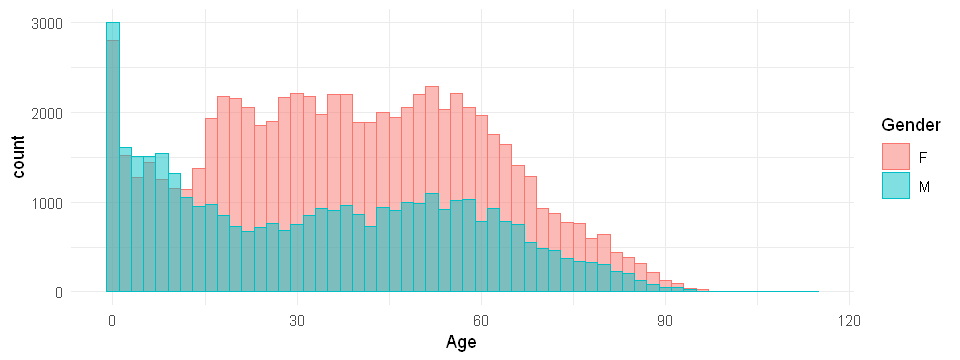

In [12]:
options(repr.plot.width = 8, repr.plot.height = 3)  
ggplot(appointment_data, aes(x=Age, fill=Gender, color=Gender)) +
    geom_histogram(binwidth=2, alpha=0.5, position="identity")

The age looks right skewed for both genders, however the females are more than males starting from the 20s.

### What is the percentage of patients who showed up and who didn't?

In [13]:
by_status = group_by(appointment_data, status)
by_status = mutate(count(by_status), ratio = n  / dim(appointment_data)[1] )
by_status

status,n,ratio
FALSE,22319,0.2019344
TRUE,88207,0.7980656


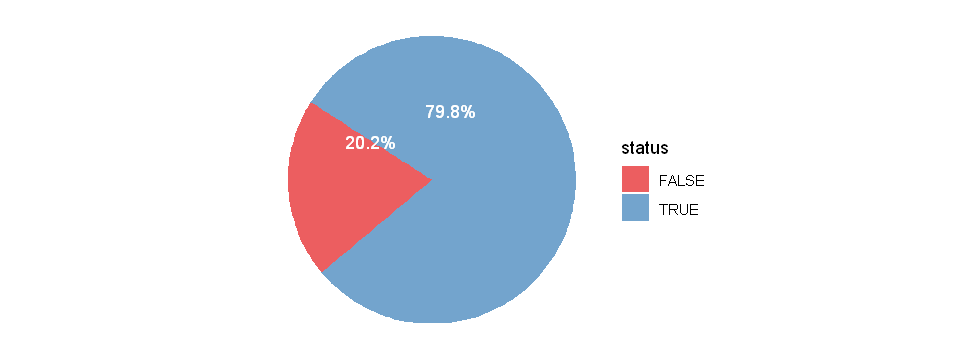

In [14]:
by_status %>% 
    ggplot(aes(x="", y=ratio, fill=status))+
    geom_bar(, stat="identity", width = 1, alpha=0.7)+
    coord_polar("y", start=-1)+
    theme_void()+
    scale_fill_brewer(palette="Set1") +
    geom_text(aes(x=1, y = cumsum(ratio) - ratio, label=scales::percent(ratio)), color="white")

The're almost 80% of all patients has been showed up and 20% hasn't.

### Who is the most committed to the schedule males or females?

Let's first see the number percentage of males vs females in th data.

In [15]:
by_gender = group_by(appointment_data, Gender)
by_gender = mutate(count(by_gender), perc = round((n  / dim(appointment_data)[1])*100, 1))
by_gender

Gender,n,perc
F,71839,65
M,38687,35


There's **35%** males and **65%** females of all the patients.

In [16]:
by_gender = group_by(appointment_data, Gender, status)
by_gender = mutate(count(by_gender), perc = round(n  / dim(appointment_data)[1]*100,1))

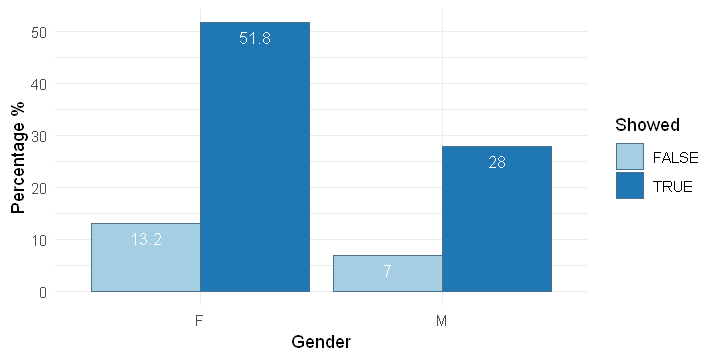

In [17]:
options(repr.plot.width = 6, repr.plot.height = 3)  
by_gender %>% 
    ggplot(aes(x=Gender, y=perc, fill=status)) +
    geom_bar(stat="identity", position=position_dodge(), color="skyblue4") +
    geom_text(aes(label=perc), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5) +
    scale_fill_brewer(palette="Paired") + 
    labs(fill="Showed", x="Gender", y="Percentage %")

The female patients is the most committed to the schedule with **51.8%**, while males just **28%**.

### Does receiving SMS or not affect showing up the patients?

In [18]:
# Group by showing up and weather received SMS or not
by_sms = group_by(appointment_data, status, SMS_received)
by_sms = mutate(count(by_sms), perc = round(n  / dim(appointment_data)[1]*100,1))
by_sms

status,SMS_received,n,perc
FALSE,FALSE,12535,11.3
FALSE,TRUE,9784,8.9
TRUE,FALSE,62509,56.6
TRUE,TRUE,25698,23.3


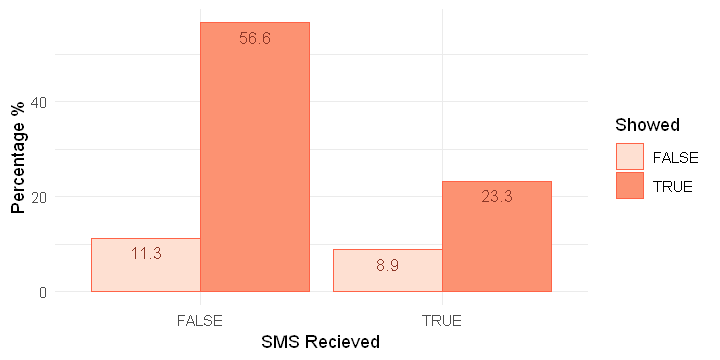

In [19]:
by_sms %>% 
    ggplot(aes(x=SMS_received, y=perc, fill=status)) +
    geom_bar(stat="identity", position=position_dodge(), color="tomato") +
    geom_text(aes(label=perc), vjust=1.6, color="tomato4",
            position = position_dodge(0.9), size=3.5) +
    scale_fill_brewer(palette="Reds") + 
    labs(fill="Showed", x="SMS Recieved", y="Percentage %")

Found that **56.6%** of who didn't received SMS showed up and **11.3%** didn't.

Also, **23.3%** of who did receive SMS showed up and **8.9%** who didn't.

### Does the duration between the apointment day and the schedule day affect showing up the patients?

In [20]:
diff_days = transmute(appointment_data, duration = as.integer(
    difftime(appointment_data$AppointmentDay, 
    appointment_data$ScheduledDay, units = "days")),
    status = appointment_data$status)
tail(diff_days)

,duration,status
110521,35,TRUE
110522,35,TRUE
110523,35,TRUE
110524,41,TRUE
110525,41,TRUE
110526,41,TRUE


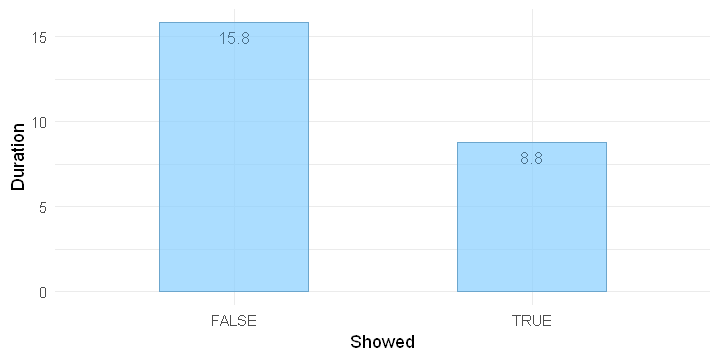

In [21]:
# Difference in days group by status
diff_days %>% 
    group_by(status) %>%
    summarise_at(vars(duration), funs(mean(., na.rm=TRUE))) %>%
    # Plot the duration vs status
    ggplot(aes(status, duration)) +
    geom_bar(stat="identity", width = 0.5, fill="skyblue1", color="skyblue3", alpha=0.7) + 
    labs(x="Showed", y="Duration") +
    geom_text(aes(label=round(duration,1)), vjust=1.6, color="skyblue4",
            position = position_dodge(0.9), size=3.5)

Surprisingly, when the average days between the schedule and the appointment day becomes higher the patient won't show up.

### Does alcoholism affect the ability to show up?

In [22]:
by_alcoholism = group_by(appointment_data, Alcoholism , status)
by_alcoholism = mutate(count(by_alcoholism), perc = round(n  / dim(appointment_data)[1]*100,1))
by_alcoholism

Alcoholism,status,n,perc
FALSE,FALSE,21642,19.6
FALSE,TRUE,85524,77.4
TRUE,FALSE,677,0.6
TRUE,TRUE,2683,2.4


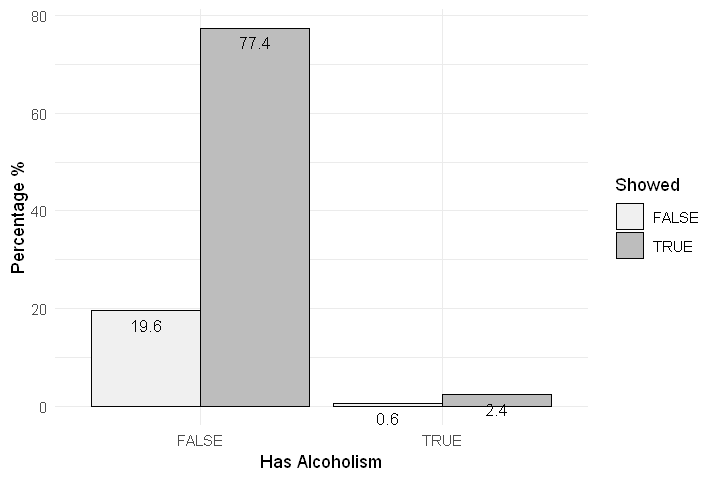

In [23]:
options(repr.plot.width = 6, repr.plot.height = 4)  
by_alcoholism %>% 
    ggplot(aes(x=Alcoholism, y=perc, fill=status)) +
    geom_bar(stat="identity", position=position_dodge(), color="grey1")+
    geom_text(aes(label=perc), vjust=1.6, color="grey2",
            position = position_dodge(0.9), size=3.5) +
    scale_fill_brewer(palette="Greys") + 
    labs(fill="Showed", x="Has Alcoholism", y="Percentage %")

Noticed that just **20%** of patients who have alcoholism and didn't show up, however **80%** of patients who have alcoholism showed up.

### Where is the place that most patients showed up?

In [24]:
# Group by Neighbourhood when a patient has showed up
by_neighbourhood = group_by(appointment_data, Neighbourhood, status = TRUE)
by_neighbourhood = mutate(count(by_neighbourhood))
maxv = max(by_neighbourhood$n)
most10 = arrange(by_neighbourhood,desc(n))[1:10,]
most10[1, ]

Neighbourhood,status,n
JARDIM CAMBURI,TRUE,7717


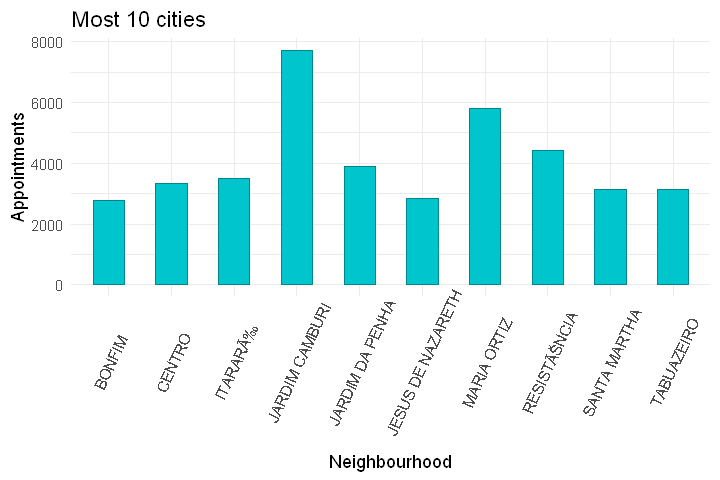

In [25]:
most10 %>% 
    ggplot(aes(Neighbourhood, n)) +
    geom_bar(stat="identity", width = 0.5, fill="turquoise3", color="turquoise4") + 
    labs(title="Most 10 cities", y="Appointments") +
    theme(axis.text.x = element_text(angle=65, vjust=0.6))

The city that has the most **`7717`** showed up patients is **`JARDIM CAMBURI`**.

### What is the most disease by which the patients are diagnosed?

In [26]:
by_disease = appointment_data[,9:12]
mean_by_disease = summarise_each(by_disease, funs( mean( .,na.rm = TRUE)))
mean_by_disease = data.frame(Disease=names(mean_by_disease), perc=round(as.double(unname(mean_by_disease))*100,1))
mean_by_disease

Disease,perc
Hipertension,19.7
Diabetes,7.2
Alcoholism,3.0
Handcap,2.0


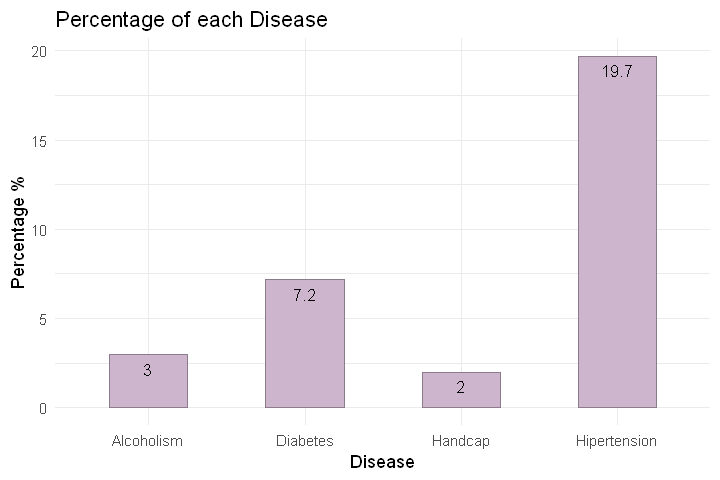

In [27]:
mean_by_disease %>% 
    ggplot(aes(x=Disease, perc)) +
    geom_bar(stat="identity", width = 0.5, fill="thistle3", color="thistle4") + 
    geom_text(aes(label=perc), vjust=1.6, color="grey2",
                position = position_dodge(0.9), size=3.5) +
    labs(title="Percentage of each Disease", y="Percentage %")

The most common disease between all patients is **`Hipertension`** with almost **20%** more than the other.

### Does a certain age more committed to the appointment than the others?

In [28]:
appointment_data %>% 
    group_by(status) %>%
    summarize(mean = round(mean(Age, na.rm = TRUE),1), median = median(Age, na.rm = TRUE))

status,mean,median
FALSE,34.3,33
TRUE,37.8,38


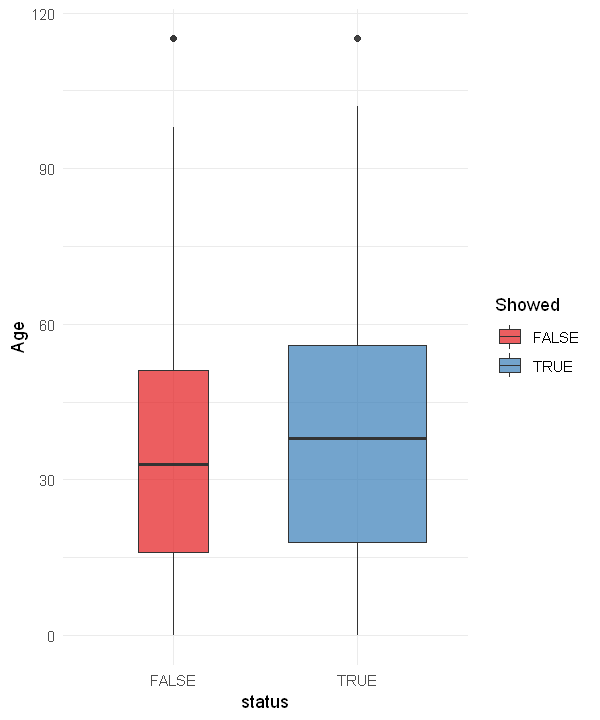

In [29]:
options(repr.plot.width = 5, repr.plot.height = 6)  
appointment_data %>% 
    ggplot(aes(status, Age, fill=status)) + 
    geom_boxplot(varwidth=T, alpha=0.7) + 
    scale_fill_brewer(palette="Set1") +
    labs(fill="Showed", y="Age")

The average age of the patients who showed up is **38** same as median. Patients who has 18 and above are more commited to the appointment than the others.

<a id='conclusions'></a>
## Conclusions

In this report we've discussed and investigated the **Medical Appointments No Shows Dataset** starting with the gathering, assessing, and cleaning the dataset. Also we've explored the data analytically by addressing some questions and drawing some conclusions about the dataset.

The outcome of the analysis:
1. Females are more committed to the schedule than males with **51.8%**.
2. **80%** of the patients has showed up.
3. Receiving SMS doesn't affect showing up the patient.
4. The longer the duration between the registration and the appointment day, the fewer patients will show up.
5. Patients who has Alcoholism are the most committed to the schedule.
6. The most city that the patients showed up is **`JARDIM CAMBURI`**.
7. **`Hipertension`** is the most disease patients will come to the appointments for and the next one is **`Diabetes`**.
8. The older a patient, the more committed to the appointment.

There're some limititions we've faced during our analysis such as:
- All the variables are categorical and therefore most of them are independent.